Notebook to generate 2018 and 2019 forecasts

In [1]:
import sys
sys.path.insert(0,'../src')
import numpy as np
import pandas as pd
import map_functions as mf
import crop_functions as cf
import preprocessing_functions as pf
import modeling_functions as mof

Edit biomass if necessary

In [2]:
file_path="../dataset/Biomass_History.csv"
df_biomass=mf.get_biomass_df(file_path)
df_biomass[df_biomass.Index==2204]



,Index,Longitude,Latitude,2010,2011,2012,2013,2014,2015,2016,2017
2204,2204,70.61481,21.04116,128.627762,128.627762,207.701965,198.535065,189.368164,207.701965,81.075325,128.627762


Generate district / index mapping

800  not assigned to a district
final shape: (2418, 6)
0  not assigned to a district


,Index,Latitude,Longitude,distname,year,biomass
0,0,24.66818,71.33144,Patan,2010,8.475744
1,1,24.66818,71.41106,Kheda,2010,24.029778
2,2,24.66818,71.49069,Banas kantha,2010,44.831635
3,3,24.66818,71.57031,Sabar kantha,2010,59.974419
4,4,24.66818,71.64994,Sabar kantha,2010,14.653370


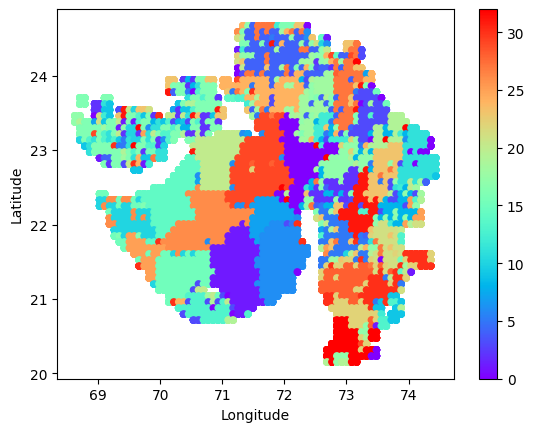

In [3]:

file_path="../dataset/districts/output.shp"
df_map=mf.create_map(file_path)
df_map=mf.add_biomass_prod(df_map,df_biomass)
df_map=mf.post_process_ditricts(df_map)


df_map.head()

Gather crop data , impute missing data for districts

In [4]:
root_folder="../dataset/desagri_all/"
df_crop=cf.generate_crop_df(root_folder)
df_crop=cf.filter_crop(df_crop)
df_crop=cf.impute_dataset(df_crop)
df_crop=cf.unpivot(df_crop)
df_crop.head()


c:\Appl\shell-ai-hackathon-2023\notebooks\../src\crop_functions.py:76: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_impute.loc[:,"sum_"+s[0]+"-"+s[1]+"-"+crop]=df_impute[relevant_cols].sum(axis=1)
c:\Appl\shell-ai-hackathon-2023\notebooks\../src\crop_functions.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_impute.loc[:,col]=0
c:\Appl\shell-ai-hackathon-2023\notebooks\../src\crop_functions.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, whic

final shape: (5456, 4)


,year,production,distname,crop_type
0,2010,786359.787184,Junagadh,Wheat
1,2011,508238.939614,Junagadh,Wheat
2,2012,106422.022198,Junagadh,Wheat
3,2013,783545.593089,Junagadh,Wheat
4,2014,310518.000000,Junagadh,Wheat


Elevation

In [5]:
df_elev=pd.read_csv("../dataset/wc2.1_30s_elev.csv").rename({"mean":"elevation"},axis=1).fillna(0) #some nan values on the borders
df_elev.head()

,min,max,count,elevation,year,month,type,index,lat,long
0,8.0,13.0,100,11.010000,0s_e,ev,2.1_,0,24.66818,71.33144
1,12.0,28.0,90,15.377778,0s_e,ev,2.1_,1,24.66818,71.41106
2,15.0,37.0,100,24.220000,0s_e,ev,2.1_,2,24.66818,71.49069
3,24.0,46.0,90,33.200000,0s_e,ev,2.1_,3,24.66818,71.57031
4,30.0,53.0,100,43.340000,0s_e,ev,2.1_,4,24.66818,71.64994


Crop land

In [6]:
df_cropland=pd.read_csv("../dataset/Global_cropland_3km_2019.csv").rename({"mean":"cropland"},axis=1).fillna(0) #some nan values on the borders
df_cropland.head()

,min,max,count,cropland,majority,median,std,sum,minority,range,year,month,type,index,biomass,lat,long
0,0.0,13.0,9,4.555556,0.0,2.0,5.057692,41.0,2.0,13.0,tif,0.0,al_c,0,5.180296,24.66818,71.33144
1,8.0,90.0,9,30.000000,11.0,20.0,25.542992,270.0,8.0,82.0,tif,0.0,al_c,1,42.126945,24.66818,71.41106
2,29.0,92.0,9,74.000000,29.0,79.0,18.938497,666.0,29.0,63.0,tif,0.0,al_c,2,73.203232,24.66818,71.49069
3,79.0,93.0,9,86.111111,81.0,85.0,4.931631,775.0,79.0,14.0,tif,0.0,al_c,3,101.067352,24.66818,71.57031
4,79.0,99.0,12,88.000000,81.0,88.0,6.258328,1056.0,79.0,20.0,tif,0.0,al_c,4,26.086885,24.66818,71.64994


Merge datasets for model training

In [7]:
df_final=pf.create_final_dataset(df_map,df_crop,df_elev,df_cropland)
df_final=pf.add_features(df_final)

df_final.head()

final shape: (24180, 24)
{0: 'Ahmadabad', 1: 'Amreli', 2: 'Anand', 3: 'Aravalli', 4: 'Banas kantha', 5: 'Bharuch', 6: 'Bhavnagar', 7: 'Botad', 8: 'Chhotaudepur', 9: 'Dang', 10: 'Devbhumi dwarka', 11: 'Dohad', 12: 'Gandhinagar', 13: 'Gir somnath', 14: 'Jamnagar', 15: 'Junagadh', 16: 'Kachchh', 17: 'Kheda', 18: 'Mahesana', 19: 'Mahisagar', 20: 'Morbi', 21: 'Narmada', 22: 'Navsari', 23: 'Panch mahals', 24: 'Patan', 25: 'Porbandar', 26: 'Rajkot', 27: 'Sabar kantha', 28: 'Surat', 29: 'Surendranagar', 30: 'Tapi', 31: 'Vadodara', 32: 'Valsad'}


,Index,Longitude,Latitude,distname,biomass,year,elevation,cropland,production-Arhar/Tur,production-Bajra,...,in_district_13,in_district_30,in_district_15,in_district_9,in_district_25,total_crop_prod,count_district,index_cotton_prod_share,district_prod_production-Cotton(lint)_sum,log_biomass
0,0,71.33144,24.66818,24,0.000000,2018,11.01,4.555556,212.0,20417.0,...,0,0,0,0,0,351958.0,760,118.653947,6853452.0,-5.000000
1,0,71.33144,24.66818,24,0.000000,2019,11.01,4.555556,51.0,13946.0,...,0,0,0,0,0,464549.0,760,115.110526,6648784.0,-5.000000
2,0,71.33144,24.66818,24,5.180296,2017,11.01,4.555556,722.0,14383.0,...,0,0,0,0,0,480627.0,760,175.772368,10152612.0,0.714355
3,0,71.33144,24.66818,24,6.023070,2013,11.01,4.555556,4.0,73818.0,...,0,0,0,0,0,576450.0,760,237.114474,13695732.0,0.779819
4,0,71.33144,24.66818,24,6.647325,2015,11.01,4.555556,0.0,16557.0,...,0,0,0,0,0,492325.0,760,151.935526,8775796.0,0.822648


Train model

In [8]:
pipeline,results=mof.train_model_log(df_final)

2010 9.8650195011619e-13 22.601826819708204


c:\Appl\shell-ai-hackathon-2023\notebooks\../src\modeling_functions.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.loc[:,"pred"]=10**pipeline.predict(X_test)
c:\Appl\shell-ai-hackathon-2023\notebooks\../src\modeling_functions.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.loc[:,"mae"]=10**y_test-10**pipeline.predict(X_test)


2011 9.762819764405951e-13 19.417846615130877


c:\Appl\shell-ai-hackathon-2023\notebooks\../src\modeling_functions.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.loc[:,"pred"]=10**pipeline.predict(X_test)
c:\Appl\shell-ai-hackathon-2023\notebooks\../src\modeling_functions.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.loc[:,"mae"]=10**y_test-10**pipeline.predict(X_test)


2012 1.0265298498095867e-12 27.727590545926972


c:\Appl\shell-ai-hackathon-2023\notebooks\../src\modeling_functions.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.loc[:,"pred"]=10**pipeline.predict(X_test)
c:\Appl\shell-ai-hackathon-2023\notebooks\../src\modeling_functions.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.loc[:,"mae"]=10**y_test-10**pipeline.predict(X_test)


2013 9.715107813815817e-13 32.97856181540302


c:\Appl\shell-ai-hackathon-2023\notebooks\../src\modeling_functions.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.loc[:,"pred"]=10**pipeline.predict(X_test)
c:\Appl\shell-ai-hackathon-2023\notebooks\../src\modeling_functions.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.loc[:,"mae"]=10**y_test-10**pipeline.predict(X_test)


2014 9.650544003887908e-13 24.95201210150995


c:\Appl\shell-ai-hackathon-2023\notebooks\../src\modeling_functions.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.loc[:,"pred"]=10**pipeline.predict(X_test)
c:\Appl\shell-ai-hackathon-2023\notebooks\../src\modeling_functions.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.loc[:,"mae"]=10**y_test-10**pipeline.predict(X_test)


2015 9.969320321737602e-13 20.811359258788798


c:\Appl\shell-ai-hackathon-2023\notebooks\../src\modeling_functions.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.loc[:,"pred"]=10**pipeline.predict(X_test)
c:\Appl\shell-ai-hackathon-2023\notebooks\../src\modeling_functions.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.loc[:,"mae"]=10**y_test-10**pipeline.predict(X_test)


2016 1.0157134769573932e-12 29.130971939438776


c:\Appl\shell-ai-hackathon-2023\notebooks\../src\modeling_functions.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.loc[:,"pred"]=10**pipeline.predict(X_test)
c:\Appl\shell-ai-hackathon-2023\notebooks\../src\modeling_functions.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.loc[:,"mae"]=10**y_test-10**pipeline.predict(X_test)


2017 9.676572697725069e-13 29.615969020645334
                      0             1             2             3  \
year       2.010000e+03  2.011000e+03  2.012000e+03  2.013000e+03   
mae_train  9.865020e-13  9.762820e-13  1.026530e-12  9.715108e-13   
mae_test   2.260183e+01  1.941785e+01  2.772759e+01  3.297856e+01   

                      4             5             6             7  \
year       2.014000e+03  2.015000e+03  2.016000e+03  2.017000e+03   
mae_train  9.650544e-13  9.969320e-13  1.015713e-12  9.676573e-13   
mae_test   2.495201e+01  2.081136e+01  2.913097e+01  2.961597e+01   

                   mean  
year       2.013500e+03  
mae_train  9.882727e-13  
mae_test   2.590452e+01  


c:\Appl\shell-ai-hackathon-2023\notebooks\../src\modeling_functions.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.loc[:,"pred"]=10**pipeline.predict(X_test)
c:\Appl\shell-ai-hackathon-2023\notebooks\../src\modeling_functions.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.loc[:,"mae"]=10**y_test-10**pipeline.predict(X_test)


Export forecasts

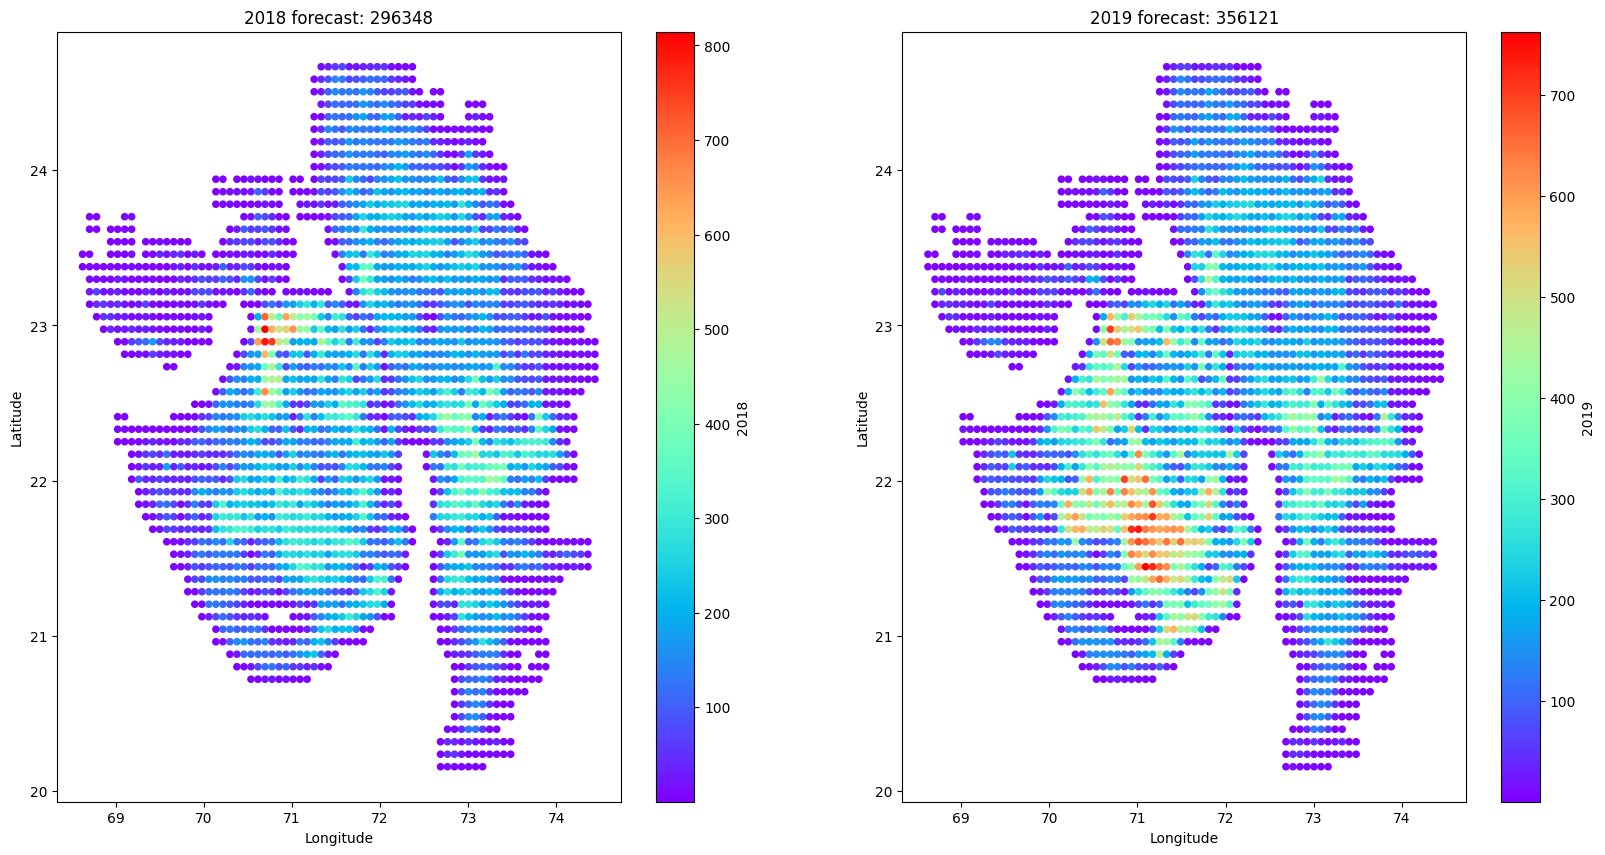

In [9]:
#predict and store 2018/2019
y_2018,y_2019=mof.generate_predictions(pipeline,df_final,"forecast_extratrees.csv")

In [10]:
features_imp=[(i,j) for i,j in zip(df_final.drop(columns=["log_biomass","biomass","year"]).columns,pipeline.steps[1][1].feature_importances_)]

sorted(features_imp, key=lambda x: x[1], reverse=True)

[('cropland', 0.5164608983573867),
 ('elevation', 0.09090029243785909),
 ('Longitude', 0.08858971349493645),
 ('Index', 0.04862090927827362),
 ('Latitude', 0.043151076785392935),
 ('index_cotton_prod_share', 0.01569447022743803),
 ('in_district_20', 0.011268242394450761),
 ('production-Cotton(lint)', 0.00993891894637078),
 ('in_district_0', 0.008760158325329542),
 ('distname', 0.008321839950866827),
 ('in_district_1', 0.0074336757195614),
 ('count_district', 0.007405161371344502),
 ('in_district_19', 0.007138596962003932),
 ('in_district_9', 0.006204829077507929),
 ('in_district_11', 0.006156145875394854),
 ('in_district_14', 0.006072725026782341),
 ('district_prod_production-Cotton(lint)_sum', 0.005744140520328655),
 ('in_district_30', 0.005346732515581894),
 ('in_district_13', 0.005145594615042954),
 ('production-Rice', 0.004938188989816713),
 ('total_crop_prod', 0.004918138631138183),
 ('in_district_31', 0.004590054132666593),
 ('in_district_23', 0.0044867034719428866),
 ('in_distri

Calculate mae on 2018 and 2019 ( done after the end of the competition based on the data provided)

In [11]:
forecast=pd.read_csv("../forecast/forecast_extratrees.csv")
true=pd.read_csv("../dataset/Biomass_private_databasea91704d.csv")

In [19]:
forecast_score_2018,forecast_score_2019=np.mean(np.abs(forecast["2018"]-true["2018"])),np.mean(np.abs(forecast["2019"]-true["2019"]))
forecast_score_2018,forecast_score_2019

(24.39883562033399, 30.693938819807258)

In [21]:
def get_score(forecast_cost,opt_cost):
    return 100-((forecast_cost*2418)+opt_cost)*80/500000
get_score(forecast_score_2018,44150),get_score(forecast_score_2019,26786)

(83.49657847520518, 83.83936894939296)